In [14]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
from pylab import legend
%matplotlib inline


In [15]:
start_date, end_date = '2018-01-01', '2022-12-31'
sykt_net_value_raw = pd.read_csv(
    '../data/san_yang_kai_tai/merged_net_values.csv', index_col='index')
sykt_net_value_raw.rename(columns={'日期': 'date'}, inplace=True)
sykt_net_value_raw['date'] = pd.to_datetime(
    sykt_net_value_raw['date'], format='%Y-%m-%d', errors='coerce')
sykt_net_value_raw.sort_values(['date'], inplace=True)
# sykt_net_value_raw

In [16]:
sindex = 'sh000300'  # 对比指数

index_daily_df = ak.stock_zh_index_daily(symbol=sindex)
# index_daily_df = pd.read_csv(
#     f'../output/指数/{sindex}_daily_history.csv', index_col='id')
index_daily_df['date'] = pd.to_datetime(index_daily_df['date'])
index_daily_df.columns = ['date', 'i_open',
                          'i_high', 'i_low', 'i_close', 'i_volume']
index_daily_df


,date,i_open,i_high,i_low,i_close,i_volume
0,2002-01-04,1316.455,1316.455,1316.455,1316.455,0
1,2002-01-07,1302.084,1302.084,1302.084,1302.084,0
2,2002-01-08,1292.714,1292.714,1292.714,1292.714,0
3,2002-01-09,1272.645,1272.645,1272.645,1272.645,0
4,2002-01-10,1281.261,1281.261,1281.261,1281.261,0
...,...,...,...,...,...,...
4994,2022-08-04,4089.442,4108.159,4064.659,4101.537,8953264400
4995,2022-08-05,4109.629,4159.485,4097.863,4156.911,10257100400
4996,2022-08-08,4142.111,4155.730,4135.081,4148.075,9020813800
4997,2022-08-09,4143.666,4161.809,4131.425,4156.291,8413695900


In [17]:
merged_df = pd.merge(sykt_net_value_raw, index_daily_df, how='left', on='date')

plt_df = merged_df[['date', '净值', 'i_close']]
plt_df = plt_df.query(f"'{start_date}' <= date <= '{end_date}'")
# plt_df


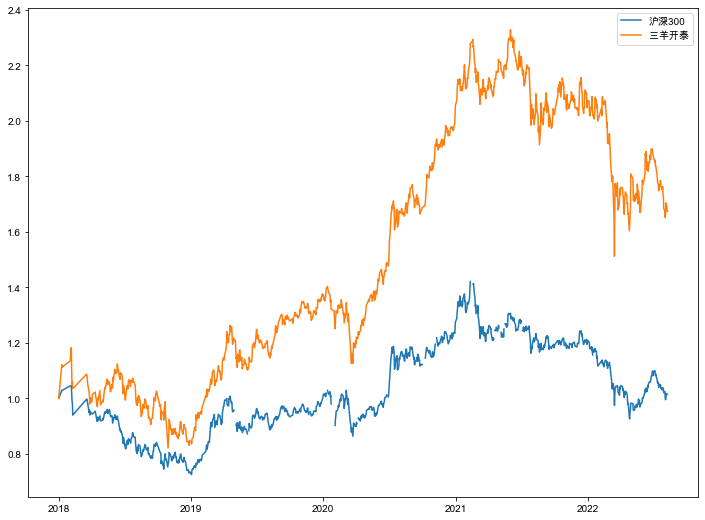

In [18]:
plt.rcParams["font.family"] = 'Arial Unicode MS'  # 设置字体，正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 设置字体，正常显示中文
plt.figure(figsize=(12, 9))

plt.plot(plt_df['date'], plt_df['i_close']/plt_df['i_close'][1], label='沪深300')
plt.plot(plt_df['date'], plt_df['净值'], label='三羊开泰')

# plt.axis('tight')

plt.legend(loc='best')
plt.savefig('../output/沪深300 vs 三羊开泰.jpeg')
